<a href="https://colab.research.google.com/github/ma-prietoo/SyS-2025-2/blob/main/Tarea_Laplace/Copia_de_EjemploSLIT2OrdenCanonicoLaplace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solución de SLIT segundo orden forma canónica utilizando transformada de Laplace en Sympy
Aplicación de fracciones parciales

In [1]:
!pip install sympy --upgrade #actualizar sympy para usar módulo de control

In [2]:
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
sym.init_printing()

s = sym.symbols('s', complex=True)
t,R, L, C = sym.symbols('t R L C', positive=True, real=True)

#Entrada de interés en Laplace
X = 1 # X(s) = 1 Respuesta entrada impulso; X(s) = 1/s resp escalón, X(s) = 1/s**2 resp a la rampa
#Forma canónica -> resolver según sistema propuesto
K = 1 #ganancia estática
wn = sym.sqrt(1/(C*L)) #frecuencia natural
xi = L/(2*R*sym.sqrt(C*L)) #factor amortiguamiento
H = K*(wn**2/(s**2 + 2*xi*wn*s + wn**2)) #función de transferencia en lazo cerrado slit 2 orden
#Hlc = H/(1+H) #para lazo cerrado
H

         1          
────────────────────
    ⎛ 2    s     1 ⎞
C⋅L⋅⎜s  + ─── + ───⎟
    ⎝     C⋅R   C⋅L⎠

In [3]:
#calcular polos
p1 = -xi*wn + 1j*wn*sym.sqrt(1-xi**2)
p2 = -xi*wn - 1j*wn*sym.sqrt(1-xi**2)
p1

                     ____________
                    ╱       L    
          1.0⋅ⅈ⋅   ╱  1 - ────── 
                  ╱            2 
    1           ╲╱        4⋅C⋅R  
- ───── + ───────────────────────
  2⋅C⋅R            √C⋅√L         

In [4]:
#evaluar valores RLC
RLC = {R: 1000, L: sym.Rational('0.18'), C: sym.Rational('0.00012')}#valores utilizados para la simulación
H.subs(RLC)

        1250000         
────────────────────────
   ⎛ 2   25⋅s   1250000⎞
27⋅⎜s  + ──── + ───────⎟
   ⎝      3       27   ⎠

In [5]:
print('p1=',p1.subs(RLC))
print('p2=',p2.subs(RLC))
print('xi=',xi.subs(RLC))
print('omega_n=',wn.subs(RLC))

p1= -25/6 + 1.38888888888889*sqrt(23991)*I
p2= -25/6 - 1.38888888888889*sqrt(23991)*I
xi= sqrt(15)/200
omega_n= 500*sqrt(15)/9


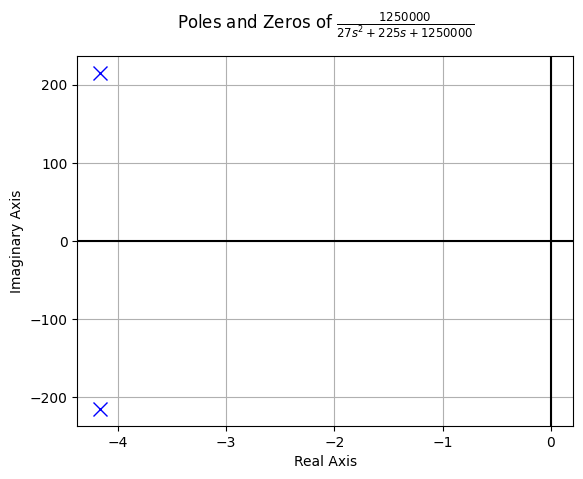

In [6]:
#gráfica polos y ceros paquete de control de sympy
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot
num,den=sym.fraction(H.subs(RLC))

tf1 = TransferFunction(num, den, s)#numerados y denomirador función de transferencia con valores evaluados de RLC
pole_zero_plot(tf1)

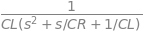

In [ ]:
#salida según entrada de interés
Y = H * X #función de transferencia del circuito multiplicada por X(s)
#Función de salida
Y

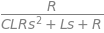

In [ ]:
#Función de salida en Laplace factorizada (fracciones parciales)
Yp = Y.apart(s) # el comando apart factoriza la expresión simbólica
Yp


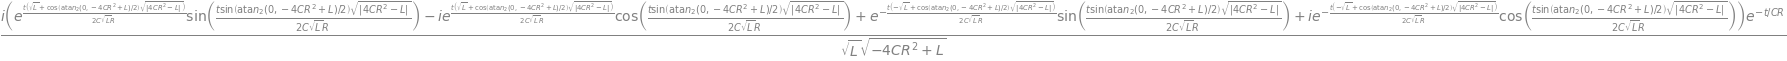

In [ ]:
#Modelo en el tiempo en función de RLC
Ye = Yp
#Se recorre cada fracción parcial según factorización para simplificar cálculos
for j in range(len(Ye.args)):
    if j==0:#primer elemento de la solucion
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else: #siguientes elementos concatenados
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t)
yt

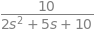

In [ ]:
#Modelo en el tiempo en función de RLC - substituir valores
Ye = Yp.subs(RLC).apart(s)
Ye


In [ ]:
#Se recorre cada fracción parcial según factorización para simplificar cálculos
for j in range(len(Ye.args)):
    if j==0:#primer elemento de la solucion
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else: #siguientes elementos concatenados
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t)
yt

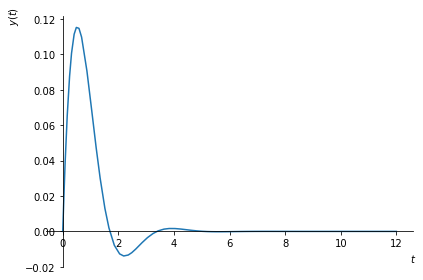

In [ ]:
#Gráfica de salida en el tiempo
sym.plot(yt,(t,0,float((3/xi*wn).subs(RLC))),xlabel='$t$', ylabel='$y(t)$')
plt.show()
